## Alunos:
- Felipe Gomes Valencio

## Exercício 3
1) Utilize o dataset “titanic.csv”, disponível no moodle. Considere 70% das instâncias para treino e
30% para validação. Construa um modelo utilizando Árvore de Decisão para prever se uma pessoa
sobreviveu ou não.
    - a) Mostre a árvore encontrada.
    - b) Qual a acurácia do modelo obtida com os dados de validação?

In [4]:
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
dataset = sns.load_dataset('titanic')
df = pd.DataFrame(data=dataset)

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df = df.dropna()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df.loc[:, 'sex'] = label_encoder.fit_transform(df['sex'])
df.loc[:, 'embarked'] = label_encoder.fit_transform(df['embarked'])
df.loc[:, 'class'] = label_encoder.fit_transform(df['class'])
df.loc[:, 'who'] = label_encoder.fit_transform(df['who'])
df.loc[:, 'adult_male'] = label_encoder.fit_transform(df['adult_male'])
df.loc[:, 'deck'] = label_encoder.fit_transform(df['deck'])
df.loc[:, 'embark_town'] = label_encoder.fit_transform(df['embark_town'])
df.loc[:, 'alone'] = label_encoder.fit_transform(df['alone'])

df

/tmp/ipykernel_43409/2375967381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'sex'] = label_encoder.fit_transform(df['sex'])
/tmp/ipykernel_43409/2375967381.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'sex'] = label_encoder.fit_transform(df['sex'])
/tmp/ipykernel_43409/2375967381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,yes,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,yes,0
6,0,1,1,54.0,0,0,51.8625,2,0,1,1,4,2,no,1
10,1,3,0,4.0,1,1,16.7000,2,2,0,0,6,2,yes,0
11,1,1,0,58.0,0,0,26.5500,2,0,2,0,2,2,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,2,0,2,0,3,2,yes,0
872,0,1,1,33.0,0,0,5.0000,2,0,1,1,1,2,no,1
879,1,1,0,56.0,0,1,83.1583,0,0,2,0,2,0,yes,0
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,1,2,yes,1


In [30]:
X = df[["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked", "class", "who","adult_male","deck","embark_town","alone"]]
Y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42) 

tree_model = tree.DecisionTreeClassifier()

[]

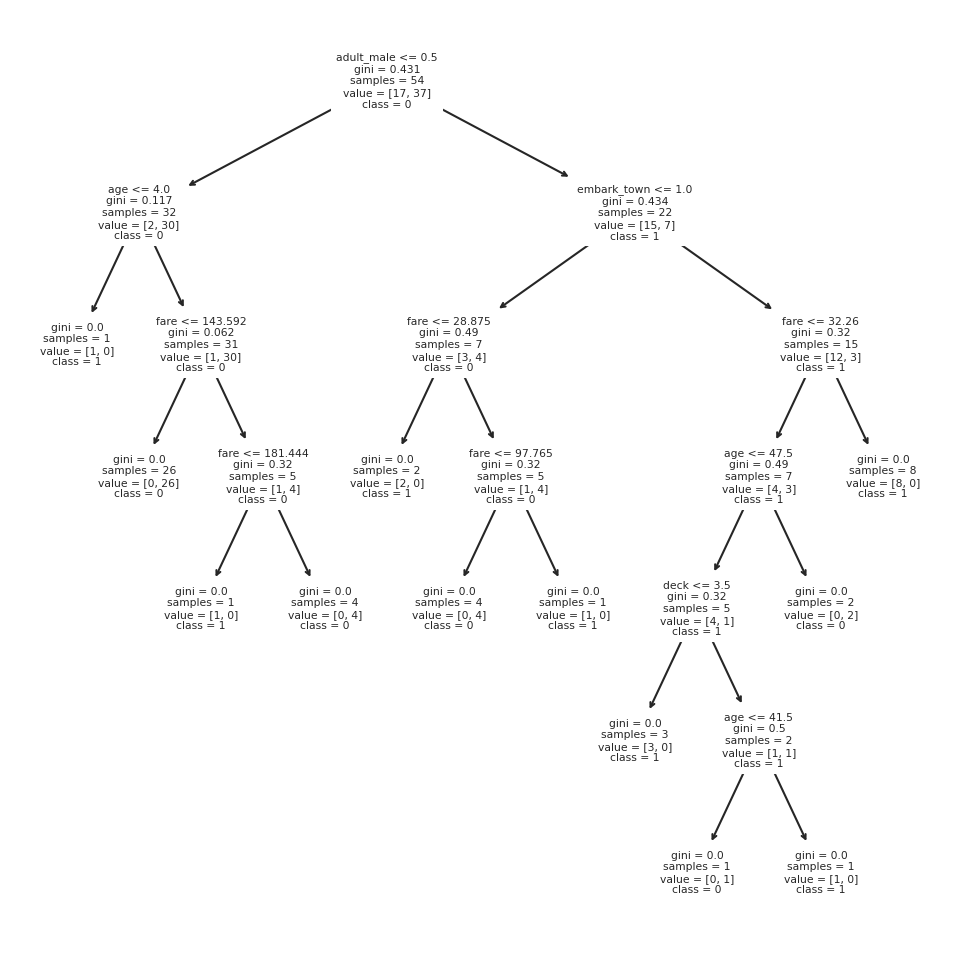

In [11]:
tree_model.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=150)

tree.plot_tree(tree_model, feature_names = X.columns, class_names=["1", "0"])

plt.plot()

In [12]:
score = tree_model.score(X_test, y_test)

print('Acurácia: ' + str(score))

Acurácia: 0.6640625


## Exercício 3

2) Considere ainda uma árvore de decisão para classificar se um indivíduo sobreviveu ou não com
base no dataset “titanic.csv”. Qual o resultado médio de acurácia utilizando a estratégia de
validação cruzada 10-fold? Discuta os resultados.

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [27]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(tree_model, X, Y, cv=kfold, scoring='accuracy')

#Visão do desempenho baseada em 10 divisões.
print("Mean: " +str(scores.mean()))

#Desvio padrão da média.
print("Desvio padrão: "+str(scores.std()))

# A validação cruzada fornece uma estimativa mais estável e confiável do desempenho do modelo do que uma única divisão de treino/teste. Isso ocorre porque diferentes subconjuntos de dados são usados como dados de teste em cada iteração, reduzindo o viés.  

Mean: 0.7578947368421053
Desvio padrão: 0.10915326477405107


## Exercício 3

3) Ainda considerando o dataset “titanic.csv”, construa um modelo utilizando k-NN para prever se uma pessoa sobreviveu ou não. Considere diferentes valores de k vizinhos: k={2,3,4,5,6,7}. Houve variação significativa nos diferentes modelos testados? Algum deles foi melhor do que a estratégia baseada em árvore de decisão?

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
neigh = KNeighborsClassifier(n_neighbors=4)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(neigh, X, Y, cv=kfold, scoring='accuracy')

print("Mean: " +str(scores.mean()))

#n_neighbors=2 -> Mean: 0.5719298245614035
#n_neighbors=3 -> Mean: 0.6818713450292397
#n_neighbors=4 -> Mean: 0.604970760233918
#n_neighbors=5 -> Mean: 0.6812865497076024
#n_neighbors=6 -> Mean: 0.6590643274853802
#n_neighbors=7 -> Mean: 0.6868421052631579

# Os melhores resultados foram com um número ímpar de vizinhos, 3, 5 e 7. Grande variação entre os resultados, sendo 7 o melhor. 3 e 5 tiveram resultados muito próximos.
# Comparado ao primeiro modelo de árvore de decisão, o KNeighbors foi melhor em todos os casos, com exceção de 4 e 2. Porém comparado com a validação cruzada, esse modelo ficou atrás por quase 7 p.p. 

Mean: 0.604970760233918
